# ROB 498: Robot Learning for Planning and Control
# Assignment 1: Introduction to PyTorch 

## Colab Setup

In [ ]:
# TODO: Fill in the Google Drive path where you uploaded the assignment
# Example: If you create a ROB498 folder and put all the files under A1 folder, then 'ROB498/HW1'
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ROB498/HW1'

### Setup Code 

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

In [ ]:
import os
import sys

GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)

files = os.listdir(GOOGLE_DRIVE_PATH)
expected_files = [ 'ROB498_hw1.ipynb', 'pytorch_intro.py', 'hands_on_regression.py', 'regression_training_data.npz', 'regression_validation_data.npz',  'robot_kinematics_regression.py', 'robot_kinematics_training_data.npz', 'robot_kinematics_validation_data.npz',  ]
print(f'Files found: {files}')

sys.path.append(GOOGLE_DRIVE_PATH)

# Verify that there are all the expected files in the directory
all_found = True
for expected_file in expected_files:
  if expected_file not in files:
    print(f'Required file {expected_file} not found!')
    all_found = False
if all_found:
  print('All required files are found :)')

In [ ]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt

## Assignment Introduction

Due 2/5 at 11:59pm

**Rules**:

1. All homework must be done individually, but you are encouraged to post questions on Piazza

2. No late homework will be accepted (unless you use your late-day tokens)

3. Submit your code on [autograder.io](http://autograder.io/)

4. Remember that copying-and-pasting code from other sources is not allowed

5. The use of additional package imports beyound the packages we provide is not allowed. The autograder will not grade your code if you use additional packages.

## 1 - PyTorch Basics (24 points)

In this section you will practice some basic tensor operations in PyTorch. Some of these questions were adapted from Juston Johnson's Deep Learning for Computer Vision class (https://web.eecs.umich.edu/~justincj/teaching/eecs498/WI2022/assignment1.html.) 


**GRADING GUIDE**

Each part will be evaluated on 2 test (1 point each) making each part worth 2 points.

In [7]:
# Imports:
from pytorch_intro import *

### Tensor Basics

a) Complete the function `create_tensor_of_pi` in `pytorch_intro.py`. The function takes as arguments integers M and N and should return a tensor of shape (M, N) which is filled with the value of 3.14



In [8]:
M, N = 3, 2

pi = create_tensor_of_pi(M, N)
print('Here is the tensor')
print(pi)

print(f'Shape of tensor: {pi.shape}')

Here is the tensor
tensor([[3.1400, 3.1400],
        [3.1400, 3.1400],
        [3.1400, 3.1400]])
Shape of tensor: torch.Size([3, 2])


b) Slice indexing - fill in the function `slice_indexing_practice` in `pytorch_intro.py`. The function takes as input a tensor of shape (M, N). The function should return the following:
- The last row of x. This should be shape (N,)
- The third column of x. This should be of shape (M, 1)
- Tensor of shape (2, 3) which contains the first two rows and first three columns of x
- even_rows_odd_cols: Two dimensional tensor containing the even rows and odd columns of x.

In [9]:
x = torch.tensor([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20]
])

(last_row, third_col, first_two_rows_three_cols, even_rows_odd_cols) = slice_indexing_practice(x)

print('Last row is ')
print(last_row)
print('Third col is')
print(third_col)
print('First two rows and first three columns are')
print(first_two_rows_three_cols)
print('Even rows and odd columns')
print(even_rows_odd_cols)

Last row is 
None
Third col is
None
First two rows and first three columns are
None
Even rows and odd columns
None


c) Slice assigment - fill in the function `slice_assignment_practice` in `pytorch_intro.py`. The function takes as input a two-dimensional tensor of shape (M, N). You should modify the input such that the first 4 rows and 6 columns are equal to:

    [0 1 2 2 2 2]
    [0 1 2 2 2 2]
    [3 4 3 4 5 5]
    [3 4 3 4 5 5]

The rest of the tensor should remain unchanged

In [ ]:
x = torch.ones(6, 8)
print('x is ')
print(x)

print('modified x is')
print(slice_assignment_practice(x))

d) Shuffle columns - complete the function `shuffle_cols`. This function takes as input a tensor of shape (M, N). It should return the following tensor y:
- The first two columns of y are copies of the first column of x
- The third column of y is the same as the third column of x
- The fourth column of y is the same as the second column of x

In [ ]:
x = torch.tensor([[-2, -4, -1, 1],
                  [-5, -3, 5, -3],
                  [4, 4, -5, -3],
                  [2, -5, -2, -5],
                  [-1, -3, 0, 1],
                  [-6, 4, 2, -1]])
y = shuffle_cols(x)
print('y is ')
print(y)

e) Reverse rows - fill in the function `reverse_rows.py`. This function takes as input a tensor of shape (M, N). It should return a tensor with the rows reversed. i.e. the first row should be equal to the last row of x, the second row should be equal to the second to last row of x, etc.

In [ ]:
x = torch.tensor([[1, 1, 1, 1],
                  [2, 2, 2, 2],
                  [3, 3, 3, 3],
                  [4, 4, 4, 4],
                  [5, 5, 5, 5]])
print('Reversed row of x is')
print(reverse_rows(x))

f) Reshaping - Complete the function `reshape_practice`. The function takes a tensor of shape (24,). It should return a tensor of shape (3, 8) such that:

    y = [[x[0], x[1], x[2],  x[3],  x[12], x[13], x[14], x[15]],
         [x[4], x[5], x[6],  x[7],  x[16], x[17], x[18], x[19]],
         [x[8], x[9], x[10], x[11], x[20], x[21], x[22], x[23]]]

   You should complete this function by using `torch.reshape`, `torch.transpose` and `torch.permute`.

In [ ]:
x = torch.arange(0, 24)
print('x is ')
print(x)

print('x reshaped is')
print(reshape_practice(x))

g) Batched matrix multiplication - you should complete the function `batched_matrix_multiply`. This function takes two matrices x and y. x is of shape (B, N, M) and y is of shape (B, M, P). B is the batched dimension. The function should return the result of the B matrix multiplications, which should be of shape (B, N, P)

In [ ]:
x = torch.tensor([[[3, 0, 0],
                   [-1, -1, -4],
                   [-2, -4, 1]],

                  [[-1, 2, 1],
                   [1, -2, -3],
                   [3, 0, -1]]])
y = torch.tensor([[[0, 1],
                   [-4, 0],
                   [-3, 0]],

                  [[-2, -4],
                   [0, 1],
                   [-3, 1]]])

print('The first matrix multiplication is')
print(torch.mm(x[0], y[0]))

print('The second matrix multiplcation is')
print(torch.mm(x[1], y[1]))

print('The batched matrix multiplications are')
print(batched_matrix_multiply(x, y))


### Autograd

h) Scalar function and gradient - complete the function `compute_scalar_function_and_grad`. The function should compute the function $y = 3 x^2$ and compute the gradient using PyTorch autograd. You should use .backward() to compute the gradient, and the function should only return y. If you have successfully implemented the function, the gradient of x should be stored in x.grad after the function has been run.

In [ ]:
x = torch.tensor([1.5])

print('y is')
print(compute_scalar_function_and_grad(x).item())

print('Gradient of x is')
print(x.grad.item())


i) Vector function and gradient. Complete the function `compute_vector_function_and_grad`. This function should compute the vector function $y = \begin{bmatrix} cos(2 x_1 + x_2) \\ sin(2 x_2 - x_1) \end{bmatrix}$ from input $x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}$. You should use autograd to compute the quantity $\begin{bmatrix} \frac{\partial y_1}{\partial x_1} + \frac{\partial y_2}{\partial x_1} \\ \frac{\partial y_1}{\partial x_2} + \frac{\partial y_2}{\partial x_2} \end{bmatrix}$. If you do this successfully the result should be stored in x.grad. This is known as a Jacobian-vector product and is the product $\frac{dy}{dx} \begin{bmatrix} 1 \\ 1 \end{bmatrix}$

In [ ]:
x = torch.tensor([-0.5, 0.5])
y = compute_vector_function_and_grad(x)

print('y is ')
print(y)

print('the Jacobian-vector product is')
print(x.grad)

j) Scalar function and partial gradient - you should complete the function `compute_scalar_function_and_partial_grad`. This function takes as input two tensors of shape (1) x and y, and should return $z=y\sqrt(x)$. You should use pytorch autograd to compute the gradient of z with respect to x, but not with y. If this is implemented correctly the gradient with respect to x should be stored in `x.grad` and `y.grad` should be None.

In [ ]:
x = torch.tensor([4.])
y = torch.tensor([0.5])

print('z is ')
print(compute_scalar_function_and_partial_grad(x, y))
print('grad x is ')
print(x.grad)
print('grad y is ')
print(y.grad)

### Forward Kinematics

k) 
In this part, we will compute the manipulator Jacobian for a 2-link planar robot.

In robotics, the Jacobian relates the velocities in joint space to the end-effector velocities. 

Given the robot joints values $\mathbf\theta = \begin{bmatrix}\theta_1 &\dots & \theta_n\end{bmatrix}^\top\in \mathbb R^n$, the forward kinematics function $f_\text{FK}$ maps the joint values to the end-effector coordinates $\mathbf x\in \mathbb R^m$. Therefore, the forward kinematics can be written as:
$$
\mathbf x = f_\text{FK}(\mathbf \theta)
$$
To obtain the end-effector velocities $\dot{\mathbf x} = \frac{d\mathbf x}{dt}\in\mathbb R^m$, by the chain rule it can be computed as
$$
\dot{\mathbf x} = \frac{\partial f_\text{FK}(\mathbf \theta)}{\partial \theta}\frac{d\theta(t)}{dt} = \frac{\partial f_\text{FK}(\mathbf \theta)}{\partial \theta}\dot{\theta} = \mathbf J(\theta) \dot{\theta}
$$
where $\mathbf J(\theta)\in \mathbb R^{m\times n}$ is called the **Jacobian**.
The Jacobian matrix represents the linear sensitivity of the end-effector velocity $\dot{\mathbf x}$ to the joint velocity $\dot{\mathbf \theta}$ as a function of the joint variables $\mathbf \theta$.

> For more information: [Lynch, Kevin. Modern Robotics.](https://modernrobotics.northwestern.edu/nu-gm-book-resource/5-1-1-space-jacobian/)

In this section, we will compute the Jacobina using the torch `autograd` tools.

Given a 2-link robot with link length $L_1$ and $L_2$, and the robot joints $
\theta = \begin{bmatrix}\theta_1 & \theta_2\end{bmatrix}^\top$, the forward kinematics are given by
$$
\mathbf x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix} = f_\text{FK}(\theta) = \begin{bmatrix} L_1 \cos\theta_1 + L_2\cos(\theta_1 + \theta_2) \\ L_1\sin\theta_1 + L_2\sin(\theta_1 + \theta_2)\end{bmatrix}
$$

![2-link manipulator](https://drive.google.com/uc?export=view&id=10gWhX8Eyfx4YFkfNYpGWenIdfgtF0Re5)


TODO: 
 1. Implement `compute_forward_kinematics` in `pytorch_intro.py`.
 2. Implement `compute_jacobian` in `pytorch_intro.py`.

In [ ]:
# Compute Forward Kinematics:

thetas = torch.zeros(2, requires_grad=True)
print(f'Forward kinematics -- thetas {thetas} end-effector position: {compute_forward_kinematics(thetas)}')



In [ ]:
# Compute Jacobian:

print(f'The jacobian for the configuration thetas={thetas} is:\n{compute_jacobian(thetas)}')

## 2 - Hands on Regression (46 points)



In this second part, we will review some classical regression methods and compare them with Neural Networks. We will also cover some data handling basics.

In [ ]:
from hands_on_regression import *

### Load Regression Data

We will work with some data, and the goal is to find a function that approximates them. Here, we first load the data.

In [ ]:
train_data_path = os.path.join(GOOGLE_DRIVE_PATH, 'regression_training_data.npz')
val_data_path = os.path.join(GOOGLE_DRIVE_PATH, 'regression_validation_data.npz')

train_data = np.load(train_data_path)
val_data = np.load(val_data_path)

# Unpack the data
xs = torch.from_numpy(train_data['x'])[:, None] # shape (N, 1)
ys = torch.from_numpy(train_data['y'])[:, None] # shape (N, 1)

xs_val = torch.from_numpy(val_data['x'])[:, None] # shape (N, 1)
ys_val = torch.from_numpy(val_data['y'])[:, None] # shape (N, 1)

Next, here we provide some code to visualize the data.

In [ ]:
# Visualize data
plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.legend()
plt.grid()
plt.show()


### Polynomial Regression

We will start by approximating the data with a polynomia of degree $d$.

$ f(x)=c_0 + c_1 x + c_2 x^2 + \dots + c_{d}x^d$

Implement `polynomial_basis_functions` in `hands_on_regression.py` (2 points)

In [ ]:
degree = 5
Xs_polynomial = polynomial_basis_functions(xs, degree)

print(f'Polynomial expansion size: {Xs_polynomial.shape}. Expected size: torch.Size([{len(xs)}, {degree+1}])')

#### Linear Least Squares


Implement `compute_least_squares_solution` in `hands_on_regression.py` to compute the Least Squares regression solution. (6 points)

 This should compute the coefficients $[c_0,\dots, c_d]$ that best fit the data `ys` given the $d$-degree plynomial expanded data `Xs_polynomial`.

In [ ]:
coeffs_poly = compute_least_squares_solution(Xs_polynomial, ys)
print(f'Computed coefficients: {coeffs_poly} \n-- It should be a torch tensor of size torch.Size([{degree+1}])). Returned size: {coeffs_poly.shape}')

In [ ]:
# visualize the polynomial fit
x_poly = torch.linspace(-5, 5, 1000)[:, None]
y_poly = torch.sum(polynomial_basis_functions(x_poly, degree) * coeffs_poly, axis=1)

plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.plot(x_poly, y_poly, color='orange', label='least squared solution')
plt.grid()
plt.legend()
plt.show()

As you can see, the fit is not great. Way need to increse the polynomial degree.
The following code will test multiple degrees. Which one is the best?

In [ ]:
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 10]  # TODO: Modify this value

fig, axes = plt.subplots(nrows=1, ncols=len(degrees), figsize=(4 * len(degrees), 3))

for i, degree in enumerate(degrees):
    Xs_polynomial = polynomial_basis_functions(xs, degree)

    coeffs_poly = compute_least_squares_solution(Xs_polynomial, ys)

    x_poly = torch.linspace(-5, 5, 1000)[:, None]
    y_poly = torch.sum(polynomial_basis_functions(x_poly, degree) * coeffs_poly, axis=1)

    ax_i = axes[i]
    ax_i.scatter(xs, ys, color='b', label='train_data')
    ax_i.scatter(xs_val, ys_val, color='g', label='val_data')
    ax_i.plot(x_poly, y_poly, color='orange', label='least squared solution')
    ax_i.set_title(f'Polynomial degree: {degree}')
    ax_i.grid()
axes[-1].legend()
plt.show()

#### Linear Least Squares using Gradient Descent






Now, we will do the same, but with a Neural Network. 
In this section, we will regress the coefficients $[c_0, \dots, c_d]$ using a single Linear layer a without bias.
You will have to implement the network, as well as the train and validation pipeline.
Here onwards, we will choose $d=6$.

But first, you will have to implement some basic functions to normalize the data.

TODO:

* Implement `get_normalization_constants` which given a tensors, it returns its normalization constants. The normalization constants are the mean and the std. (2 points)
* Implement `normalize_tensor` that returns the normalized tensor for the given normalization constants. (2 points)
* Implement `denormalize_tensor` that inverts the normalization of tensor for the given normalization constants. (2 points)


In [2]:
from hands_on_regression import *
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import os

class SimpleDataset(Dataset):
    def __init__(self, Xs, ys):
        self.Xs = Xs
        self.ys = ys

    def __len__(self):
        return len(self.Xs)

    def __getitem__(self, idx):
        x_i = self.Xs[idx]
        y_i = self.ys[idx]
        return x_i, y_i



# #xpand data using the polynomial basis fuctions
degree = 6 # Minimum degree that explains the data.
Xs_polynomial = polynomial_basis_functions(xs, degree)
Xs_polynomial_val = polynomial_basis_functions(xs_val, degree)


# Normalize the data
X_mean, X_std = get_normalization_constants(Xs_polynomial)
y_mean, y_std = get_normalization_constants(ys)
Xs_polynomial_norm = normalize_tensor(Xs_polynomial, X_mean, X_std)
ys_polynomial_norm = normalize_tensor(ys, y_mean, y_std) 
Xs_polynomial_val_norm = normalize_tensor(Xs_polynomial_val, X_mean, X_std )
ys_polynomial_val_norm = normalize_tensor(ys_val, y_mean, y_std)

# Force Xs to have the first column as 1s to have the bias effect and avoid normalization
Xs_polynomial_norm[:,0] = 1 # Force biases to 1
Xs_polynomial_val_norm[:, 0] = 1 # Force biases to 1

# Create Datasets
train_dataset = SimpleDataset(Xs_polynomial_norm, ys_polynomial_norm)
val_dataset = SimpleDataset(Xs_polynomial_val_norm, ys_polynomial_val_norm)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))


We will save the normalization constants for evaluation. You will have to submit `regression_norm_constants.pt` along with your implementation.

In [3]:
# save normalization constants:
norm_constants = {
   'X_mean': X_mean,
   'X_std': X_std,
   'y_mean': y_mean,
   'y_std': y_std, 
}
save_path = os.path.join('regression_norm_constants.pt')
torch.save(norm_constants, save_path)

Next, we will train our model. 
Implement the `LinearRegressor` class in `hands_on_regression.py`. 
This NN should be a single Linear layer without biases.
Remember to initialize the NN weights in the `__init__`. 

You will also have to implement the training functionalities. Explicitly, you need to implement:
* `train_step`: Perfoms an epoch of training the model.
* `val_step`: Perfoms an epoch of model performance validation. 
* `train_model`: Trains the given model for `num_epochs` epochs. You may need to use `train_step` and `val_step`.

For loss, use MSE loss. You can use `F.mse_loss`.
For parameter optimization, use Stochastic Gradient Descent (SGD).


The training should take about 2 min.

Check the loss curves and modify the `NUM_EPOCHS` and `LR` hyperparameters.

Epoch 20000/20000 | Train Loss: 0.0026 | Val Loss: 0.0022: 100%|██████████| 20000/20000 [00:36<00:00, 541.96it/s]


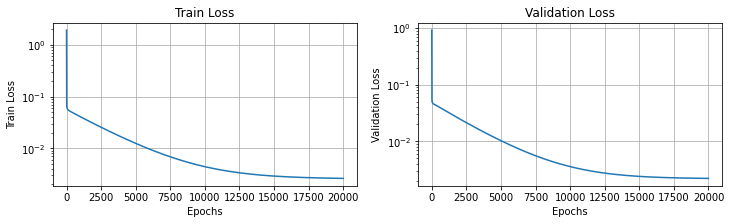

In [4]:
LR = 0.05
NUM_EPOCHS = 20000

linear_regressor = LinearRegressor(Xs_polynomial.shape[-1])

train_losses, val_losses = train_model(linear_regressor, train_loader, val_loader, num_epochs=NUM_EPOCHS, lr=LR)

# plot train loss and test loss:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].plot(train_losses)
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')
axes[1].plot(val_losses)
axes[1].grid()
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss')
axes[1].set_yscale('log')

We will save the trained model. You will have to submit it along your code.

In [6]:
# save model:
save_path = os.path.join('linear_regressor.pt')
torch.save(linear_regressor.state_dict(), save_path)

Let's visualize the performance:

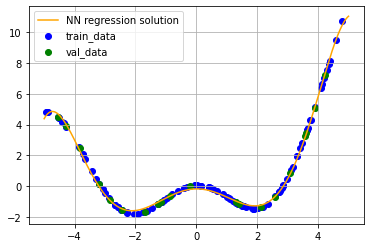

In [7]:
# create evaluation data:
x_nn = torch.linspace(-5, 5, 1000, dtype=torch.float32)[:,None]
X_nn = polynomial_basis_functions(x_nn, degree)
# Normalize data
X_nn_norm = normalize_tensor(X_nn, X_mean, X_std )
X_nn_norm[:,0] = 1 # Force biases to 1

y_nn_norm = linear_regressor(X_nn_norm)
y_nn = denormalize_tensor(y_nn_norm, y_mean, y_std).detach().cpu()
plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.plot(x_nn, y_nn, color='orange', label='NN regression solution')
plt.grid()
plt.legend()
plt.show()

**GRADING GUIDE**

Your `linear_regressor` implementation will be graded by evaluating its predictive accuracy on the validation data provided (6 points) as well as a hidden test data set (6 points).
Your model will have to have a predicive score of less than 0.05.

We will also evaluate the model to have the desired architecture (4 points)

In [8]:
y_pred_norm = linear_regressor(Xs_polynomial_norm)
y_pred = denormalize_tensor(y_pred_norm, y_mean, y_std)
train_score = F.mse_loss(y_pred, ys).item()
y_pred_norm_val = linear_regressor(Xs_polynomial_val_norm)
y_pred_val = denormalize_tensor(y_pred_norm_val, y_mean, y_std)
val_score = F.mse_loss(y_pred_val, ys_val).item()
print(f'Train set score: {train_score}')
print(f'Validation set score: {val_score}')

Train set score: 0.02176421694457531
Validation set score: 0.018481219187378883


Observe that although the neural network can do a good job approximating the data, its performance is only good within the training distribution. 

Observe predicted values outside the training distribution:

torch.Size([1000, 1])


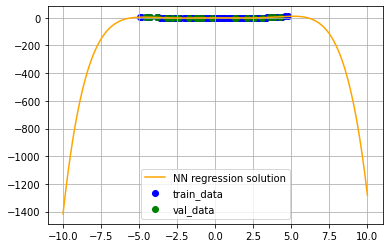

In [9]:
# Visualize out-of-distribution performance:
x_nn = torch.linspace(-10, 10, 1000, dtype=torch.float32)[:, None]
X_nn = polynomial_basis_functions(x_nn, degree)
# Normalize data
X_nn_norm = normalize_tensor(X_nn, X_mean, X_std )
X_nn_norm[:,0] = 1 # Force biases to 1

y_nn_norm = linear_regressor(X_nn_norm)
y_nn = denormalize_tensor(y_nn_norm, y_mean, y_std).cpu().detach()
print(y_nn.shape)
plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.plot(x_nn, y_nn, color='orange', label='NN regression solution')
plt.grid()
plt.legend()
plt.show()

### Neural Network as a General Function Approximation

In this section we will show that NN are capable of approximating general functions without the need of a set of basis functions.

TODO: 

* Implement the `GeneralNN`, which should be a 3 fully-connected layers with hidden sizes 100 and Tanh activations. The network input features are one-dimensional as well as the output features.

Note that in this case we are not normalizing the data. For this case observe that the performance of deep neural netowrks is good even without normalizing the data.

Epoch 15000/15000 | Train Loss: 0.0017 | Val Loss: 0.0014: 100%|██████████| 15000/15000 [00:42<00:00, 349.88it/s]


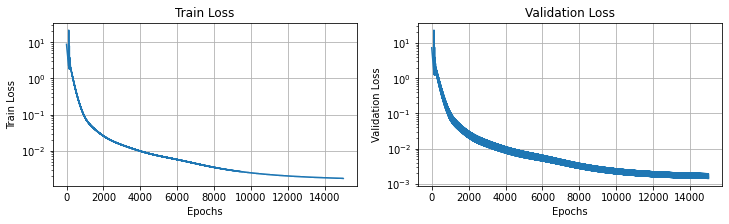

In [16]:
# Hyperparameters:
LR = 1e-2
NUM_EPOCHS = 15000

# Initialize the model
general_nn = GeneralNN()

# Create dataset without polynomial basis functions:
train_dataset = SimpleDataset(xs, ys)
val_dataset = SimpleDataset(xs_val, ys_val)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=len(train_dataset))
val_loader = DataLoader(val_dataset, batch_size=len(val_dataset))

# Train the model
train_losses, val_losses = train_model(general_nn, train_loader, val_loader, num_epochs=NUM_EPOCHS, lr=LR)

# plot train loss and test loss:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))
axes[0].plot(train_losses)
axes[0].grid()
axes[0].set_title('Train Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Train Loss')
axes[0].set_yscale('log')
axes[1].plot(val_losses)
axes[1].grid()
axes[1].set_title('Validation Loss')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Validation Loss')
axes[1].set_yscale('log')

In [17]:
# save model:
save_path = os.path.join('./general_nn.pt')
torch.save(general_nn.state_dict(), save_path)

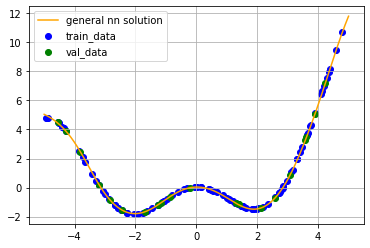

In [12]:
# Create evaluation data
x_nn = torch.linspace(-5, 5, 1000, dtype=torch.float32)[:, None]
X_nn = x_nn

# Call the method
y_nn = general_nn(X_nn).cpu().detach()

# Plot the data to evaluate the fit.
plt.scatter(xs, ys, color='b', label='train_data')
plt.scatter(xs_val, ys_val, color='g', label='val_data')
plt.plot(x_nn, y_nn, color='orange', label='general nn solution')
plt.grid()
plt.legend()
plt.show()

**GRADING GUIDE**

Your `general_nn` implementation will be graded by evaluating its predictive accuracy on the validation data provided (6 points) as well as a hidden test data set (6 points).
Your model will have to have a predicive score of less than 0.01.

We will also evaluate the model to have the desired architecture (4 points)

In [13]:
y_pred = general_nn(xs[:, None])
train_score = F.mse_loss(y_pred, ys).item()
y_pred_val = general_nn(xs_val[:, None])
val_score = F.mse_loss(y_pred_val, ys_val).item()
print(f'Train set score: {train_score}')
print(f'Validation set score: {val_score}')

Train set score: 16.54764175415039
Validation set score: 13.647716522216797


C:\Users\Administrator\.conda\envs\grasp\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Using a target size (torch.Size([100, 1])) that is different to the input size (torch.Size([100, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  
C:\Users\Administrator\.conda\envs\grasp\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  after removing the cwd from sys.path.


## 3 - Robot Kinematics Regression (30 points)

We have already seen an example of a robot kinematics problem for a 2-link robot manipulator, here we will consider a 3-link robot manipulator. 

Recall that the forward kinematics function is $$\mathbf x = f_\text{FK}(\mathbf \theta)$$

Unfortunately there is noise and a systematic error between the actual end-effector position $\mathbf{x}$ and the end-effector position predicted from the analytic kinematics solution. This error is a nonlinear function of the commanded joint configuration $\theta_{\text{des}}$. See the image below.

This error could come from a number of sources - for example the robot's motors could be unable to supply adequate torque for counteracting gravity in some configurations, or there could be state-dependent error in the robot joint encoders. 



![underpowered_3_link_manipulator](https://drive.google.com/uc?export=view&id=19TwxG36_cUcnKTQZBOwn2KNWO8zdidQd)

In this question, you are given a dataset of the commanded joint configuration $\theta_{des}$ and the corresponding end-effector positions $\mathbf x$. Your task is to learn a Neural Network to approximate the function

 $$  \mathbf x = f_\text{FK}(\mathbf \theta_{des})$$

 For this problem you need to:

 * Complete the `MLP` class in `robot_kinematics_regression.py`
      * The Neural Network should contain 1 hidden layer
      * The hidden layer size should be 128
      * You should use ReLU activations
 * Train your model on the dataset below.
      * You should normalize the features and targets of this dataset
 * Save the trained model as `robot_kinematics_model.pt`

For this question you will only be assessed on
1. Completing the `MLP` class correctly
2. The final performance of your learned model 

You are encouraged to reuse code from the previous question. 


In [18]:
from robot_kinematics_regression import * 
from hands_on_regression import *

# Prepare the data:
train_data_path = os.path.join('robot_kinematics_training_data.npz')
val_data_path = os.path.join('robot_kinematics_validation_data.npz')

train_data = np.load(train_data_path)
val_data = np.load(val_data_path)

# Unpack the data
# we will use x for input and y for target to keep consistent with previous question
x = torch.from_numpy(train_data['theta'])
y = torch.from_numpy(train_data['x'])

x_val = torch.from_numpy(val_data['theta'])
y_val = torch.from_numpy(val_data['x'])

# --- Your code here


# ---


**GRADING GUIDE**

Your `MLP` implementation will be graded by evaluating its predictive accuracy on the validation data provided (13 points) as well as a hidden test data set (13 points).
Your model will have to have a predicive score of less than 0.01.

The remaining 4 points are for the right network architecture.

In [26]:
import torch

a = torch.tensor([1.0, 2.0, 3.5])
print(a.dtype)  # 输出: torch.float32

torch.float32
